# Markov Chain Monte Carlo (MCMC) 

MCMC is a method to sample parameter values from a posterior distribution to calibrate a model. It creates a Markov chain where the next state depends only on the current state. Over time, the states of the chain represent samples from the desired distribution. Common MCMC methods include the Metropolis-Hastings algorithm and the Gibbs sampler.

First, the data is generated using quadratic model with added normal noise: $y = 3x^2 - x + 5 + \epsilon$ where $\epsilon \sim (0,3^2)$. Normal Probability Density Function and the model function is created to predict the y given the mean $\mu$ and standard deviation $\sigma$. Below is where function created and a graph for visualization.

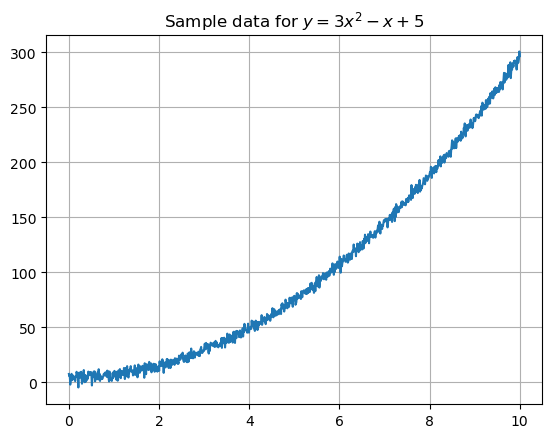

In [10]:
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed(20)

# Generate data 
x = np.linspace(0, 10, 1000)
y = 3 * x**2 - x + 5 + np.random.normal(loc = 0,scale=3, size=1000)

# Define the normal probability density function (PDF)
def normal_pdf(x, mean, std):
    return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std**2))

# Define the quadratic model
def model(x, a, b, c):
    return a * x**2 + b * x + c

plt.title('Sample data for ' + r'$y=3x^2-x+5$')
plt.plot(x,y)
plt.grid()


The formula is integral to the likelihood calculation when fitting a model to data using the Metropolis-Hastings algorithm. This formula is derived from fundamental principles of probability and statistics, specifically Bayesian inference and the properties of the normal distribution. 
$$
normal PDF(y,\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}exp(-\frac{(y-\sigma)^2}{2\sigma^2})
$$
In the context of Bayesian inference, the likelihood of observing the data is given the model parameters is calculated. For normally distributed errors, the log-likelihood for a set of observations $(x_i,y_i)$, converting the product into sum is: 
$$ 
logL(a,b,c) = \sum^{n}_{i=1} log(\frac{1} {\sigma\sqrt{2\pi}}  exp( -\frac{(y_i - f(x_i; a,b,c))^2}{2\sigma^2}))
$$

This simplifies into: 
$$
logL(a,b,c) = -nlog(\sigma \sqrt{2\pi}) - \frac{1}{2\sigma^2} \sum^{n}_{i=1} (y_i - f(x_i; a,b,c))^2
$$

Since $-nlog(\sigma \sqrt{2\pi})$ is constant, it can be ignored for comparison purposes, leading to:
$$
logL(a,b,c) \propto - \frac{1}{2\sigma^2} \sum^{n}_{i=1} (y_i - f(x_i; a,b,c))^2
$$



In [11]:
# Initial values (can be random or zeros)
a, b, c = np.random.uniform(-1, 1, 3)

max_likelihood = -float('inf')
epsilon = 1e-10
iterations = 10000
std_dev = 5

# Best coefficients initialization
best_a, best_b, best_c = a, b, c


First, the Metropolis-Hastings algorithm is used to sample from the posterior distribution of the model parameters. We start with initial values of a,b,c and compute the initial likelihood. Then we move on to proposal step where 

$$
a' = a + N(0, \sigma_{proposal})
$$
$$
b' = b + N(0, \sigma_{proposal})
$$
$$
c' = c + N(0, \sigma_{proposal})
$$


Second, compute the likelihood of the proposed parameters by calculating the predicted $y$ values 

$$
y'_{pred} = f(x;a',b',c')
$$

compute the log-likelihood of the proposed parameters:

$$
logL(a,b,c) = \sum^n_{i=1}log(normal_pdf(y_i, y'_{pred_i},\sigma))
$$


Third, compute the acceptance probability 

$$
\alpha = exp(logL(a',b',c') - logL(a,b,c))
$$

Fourth is to accept or reject the new parameter by draw from uniform random number $u$. If $u <$ acceptance probability, accept the new parameter $(a,b,c \leftarrow a',b',c')$. If the new likelihood is higher than the current likelihood, always accept the new parameters.

In [12]:


for i in range(iterations):
     # Proposal step: generate new candidate coefficients
     a_new = a + np.random.normal(0, 0.5)
     b_new = b + np.random.normal(0, 0.5)
     c_new = c + np.random.normal(0, 0.5)
     # Compute the predicted y values and the likelihood
     y_pred_new = model(x, a_new, b_new, c_new)
     pdf_values_new = normal_pdf(y, y_pred_new, std_dev)
     likelihood_new = np.sum(np.log(pdf_values_new + epsilon))

     # Compute the acceptance probability
     y_pred = model(x, a, b, c)
     pdf_values = normal_pdf(y, y_pred, std_dev)
     likelihood = np.sum(np.log(pdf_values + epsilon))

     # Compute the acceptance probability
     acceptance_prob = np.exp(likelihood_new - likelihood)

     # Debugging output to trace the steps
     print(f"Iteration {i}:")
     print(f"  Current coefficients: a = {a}, b = {b}, c = {c}")
     print(f"  Proposed coefficients: a_new = {a_new}, b_new = {b_new}, c_new = {c_new}")
     print(f"  Current likelihood: {likelihood}")
     print(f"  Proposed likelihood: {likelihood_new}")
     print(f"  Acceptance probability: {acceptance_prob}")
     print(f"  Max likelihood: {max_likelihood}")
     print(f"  Best coefficients so far: a = {best_a}, b = {best_b}, c = {best_c}")

     # Accept or reject the new state
     if likelihood_new > likelihood or np.random.uniform(0, 1) < acceptance_prob:
         a, b, c = a_new, b_new, c_new
         if likelihood_new > max_likelihood:
             max_likelihood = likelihood_new
             best_a, best_b, best_c = a_new, b_new, c_new


# Perform the Metropolis-Hastings simulation
print(f"Best coefficients: a = {best_a}, b = {best_b}, c = {best_c}")
print(f"Maximum likelihood: {max_likelihood}")


Iteration 0:
  Current coefficients: a = -0.8934011915936522, b = 0.23003567677045322, c = 0.35471512823859586
  Proposed coefficients: a_new = -0.005369846107265541, b_new = -0.31927475572142094, c_new = 0.12231869085214575
  Current likelihood: -18637.815273114848
  Proposed likelihood: -18229.180806833792
  Acceptance probability: 2.9355793317471498e+177
  Max likelihood: -inf
  Best coefficients so far: a = -0.8934011915936522, b = 0.23003567677045322, c = 0.35471512823859586
Iteration 1:
  Current coefficients: a = -0.005369846107265541, b = -0.31927475572142094, c = 0.12231869085214575
  Proposed coefficients: a_new = -0.5066901260649739, b_new = -0.19927784137175114, c_new = 0.6992914992780269
  Current likelihood: -18229.180806833792
  Proposed likelihood: -18462.227278165796
  Acceptance probability: 6.154651598409568e-102
  Max likelihood: -18229.180806833792
  Best coefficients so far: a = -0.005369846107265541, b = -0.31927475572142094, c = 0.12231869085214575
Iteration 2:


C:\Users\ntk00\AppData\Local\Temp\ipykernel_7748\3144581815.py:17: RuntimeWarning: overflow encountered in exp
  acceptance_prob = np.exp(likelihood_new - likelihood)


Iteration 2921:
  Current coefficients: a = 3.0288357066452356, b = -1.2172036938810589, c = 5.1741932739167
  Proposed coefficients: a_new = 3.2754441452439202, b_new = -0.662670741067621, c_new = 4.30666258547962
  Current likelihood: -2703.617621724408
  Proposed likelihood: -6433.936097662493
  Acceptance probability: 0.0
  Max likelihood: -2703.617621724408
  Best coefficients so far: a = 3.0288357066452356, b = -1.2172036938810589, c = 5.1741932739167
Iteration 2922:
  Current coefficients: a = 3.0288357066452356, b = -1.2172036938810589, c = 5.1741932739167
  Proposed coefficients: a_new = 3.19673863133001, b_new = -1.2406491953568644, c_new = 4.447491025483185
  Current likelihood: -2703.617621724408
  Proposed likelihood: -3705.354130585749
  Acceptance probability: 0.0
  Max likelihood: -2703.617621724408
  Best coefficients so far: a = 3.0288357066452356, b = -1.2172036938810589, c = 5.1741932739167
Iteration 2923:
  Current coefficients: a = 3.0288357066452356, b = -1.21720

In [13]:
print(f"  Current coefficients: a = {a}, b = {b}, c = {c}")
print(f"  Proposed coefficients: a_new = {a_new}, b_new = {b_new}, c_new = {c_new}")
print(f"  Current likelihood: {likelihood}")
print(f"  Proposed likelihood: {likelihood_new}")
print(f"  Acceptance probability: {acceptance_prob}")
print(f"  Max likelihood: {max_likelihood}")
print(f"  Best coefficients so far: a = {best_a}, b = {best_b}, c = {best_c}")

  Current coefficients: a = 3.0309554530559324, b = -1.4021733465734332, c = 6.221634437946399
  Proposed coefficients: a_new = 3.159984967109262, b_new = -1.3624622028477786, c_new = 6.0232085394329244
  Current likelihood: -2705.093676334156
  Proposed likelihood: -3399.694831842842
  Acceptance probability: 2.1804746348597954e-302
  Max likelihood: -2702.379286342489
  Best coefficients so far: a = 3.0123203381599915, b = -1.1061989925335336, c = 5.030593554990187
